## Reparación de maquinas

**Diciplina del servicio: FIFO**

Cada vez que una maquina comienza a trabajar, el tiempo que funciona hasta descomponerse es una variable aleatoria, independiente de las anteriores, con función de distribucion $F$.


**Distribución de descompostura $F$**
$$ F \sim expo(60) $$

Todos los tiempos de reparación son variables aleatorias independientes e identicamente distribuidas que siguen una funcion de distribución comun $G$.

**Distribución de tiempos de reparación $G$**

$$G \sim expo(4)$$


In [1]:
import numpy as np
import pandas as pd
from random import random
from math import log

expo = lambda b: - b*log(random())

def reparacion():
    t = 0
    t1 = 0
    r = 0
    s = 3 # solo maquinas
    t_n = 1000000 # tiempo de servicio
    x = np.round([expo(60) for i in range(7)],2) # Tiempos de descompostura
    x.sort()
    u = np.round([expo(4) for i in range(7)],2)
    u.sort()
    y = x + u # Tiempos de reparacion
    y.sort()
    print(x)
    print(y)
    tiempo = []
    sistema = []
    for i in range(1000000):
        t1 = x.min()
        if t1<t_n:
            t = t1
            tiempo.append(t)
            r+=1
            sistema.append(r)
            print("\nSe descompone {0} maquina en t1 = {1}".format(r,t))
            t_n = y.min() # tiempo de reparacion 
            print("tiempo de reparacion",y[r-1])
            x = np.append(x,x[0]+round(expo(60),2))
            x = np.delete(x,0)
            x.sort()
            print(x)
            if r==s:
                print("\nSe han acabado las maquinas")
                break 
        else: # t_n <= t1
            t = t_n
            tiempo.append(t)
            r = r-1
            sistema.append(r)
            print("\nMaquina reparada, t_n = {0}".format(t))
            y = np.append(y,x[-1]+round(expo(4),2))
            y = np.delete(y,0)
            y.sort()
            if r==0:
                t_n = 1000000 # ya no hay maquinas descompuestas
            else:
                t_n = y[r-1]
    return pd.DataFrame([sistema,tiempo],index=["maquinas descomp.","tiempo"])

I = reparacion()
I

[ 11.07  14.    20.64  30.02  64.44  83.05 161.24]
[ 11.4   14.87  21.56  31.05  65.84  90.72 174.77]

Se descompone 1 maquina en t1 = 11.07
tiempo de reparacion 11.4
[ 14.    20.64  30.02  64.44  83.05 161.24 284.09]

Maquina reparada, t_n = 11.4

Se descompone 1 maquina en t1 = 14.0
tiempo de reparacion 14.87
[ 18.51  20.64  30.02  64.44  83.05 161.24 284.09]

Maquina reparada, t_n = 14.87

Se descompone 1 maquina en t1 = 18.509999999999998
tiempo de reparacion 21.560000000000002
[ 20.64  30.02  64.44  83.05 123.8  161.24 284.09]

Se descompone 2 maquina en t1 = 20.64
tiempo de reparacion 31.05
[ 20.88  30.02  64.44  83.05 123.8  161.24 284.09]

Se descompone 3 maquina en t1 = 20.88
tiempo de reparacion 65.84
[ 30.02  64.44  83.05 101.55 123.8  161.24 284.09]

Se han acabado las maquinas


,0,1,2,3,4,5,6
maquinas descomp.,1.00,0.0,1.0,0.00,1.00,2.00,3.00
tiempo,11.07,11.4,14.0,14.87,18.51,20.64,20.88


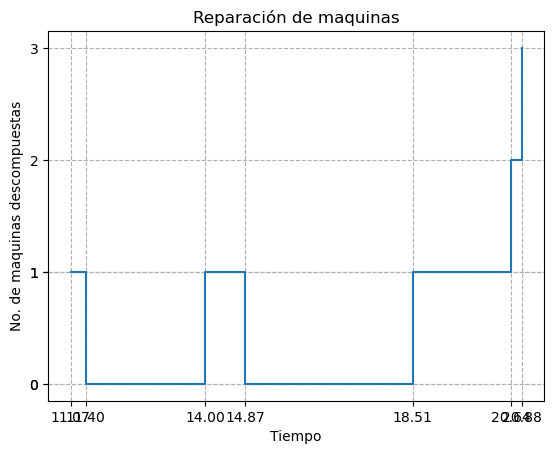

In [2]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots()

plt.step(I.iloc[1,0:],I.iloc[0,0:],where="post")
plt.title("Reparación de maquinas")
plt.ylabel("No. de maquinas descompuestas")
plt.xlabel("Tiempo")
ax.set_xticks(I.iloc[1,0:])
ax.set_yticks(I.iloc[0,0:])
plt.grid(linestyle = 'dashed')
plt.show()

## Tiempo promedio en que se descomponenen todas las maquinas

In [8]:
def reparacion1():
    t = 0
    t1 = 0
    r = 0
    s = 3
    t_n = 1000000
    x = np.round([expo(60) for i in range(7)],2)
    x.sort()
    u = np.round([expo(4) for i in range(7)],2)
    u.sort()
    y = x + u
    y.sort()
    tiempo = []
    sistema = []
    for i in range(1000000):
        t1 = x.min()
        if t1<t_n:
            t = t1
            tiempo.append(t)
            r+=1
            sistema.append(r)
            
            t_n = y.min()
            
            x = np.append(x,x[0]+round(expo(60),2))
            x = np.delete(x,0)
            x.sort()
            
            if r==s:
                break 
        else:
            t = t_n
            tiempo.append(t)
            r = r-1
            sistema.append(r)
            
            y = np.append(y,x[-1]+round(expo(4),2))
            y = np.delete(y,0)
            y.sort()
            if r==0:
                t_n = 1000000
            else:
                t_n = y[r-1]
    return pd.DataFrame([sistema,tiempo],index=["maquinas descomp.","tiempo"])

print("Tiempo promedio en que se descomponen todas las maquinas:",np.array([reparacion1().iloc[1].max() for i in range(7000)]).mean())

Tiempo promedio en que se descomponen todas las maquinas: 55.786404285714276


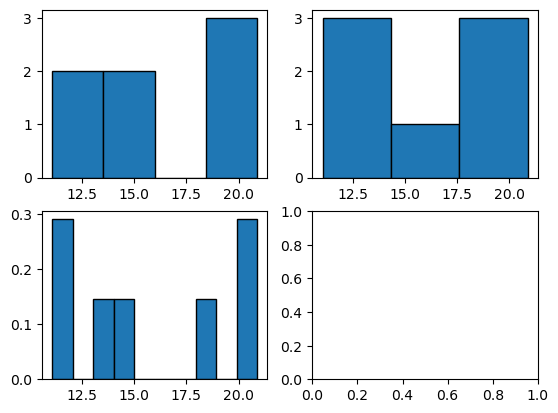

In [4]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,2)

ax[0,0].hist(np.array(I.iloc[1]), bins='sturges',edgecolor='black')
ax[0,1].hist(np.array(I.iloc[1]), bins='sqrt',edgecolor='black')
ax[1,0].hist(np.array(I.iloc[1]), density=True,edgecolor='black')

plt.show()

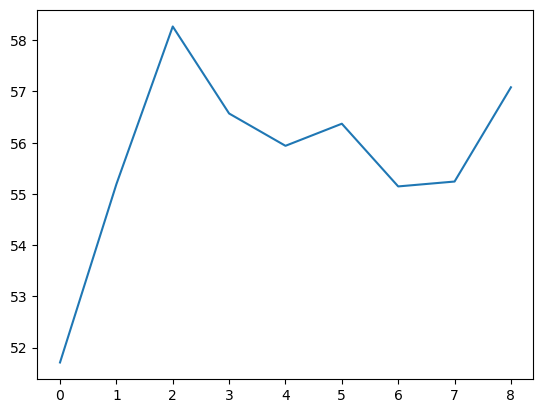

In [11]:
import matplotlib.pyplot as plt
N = 1000
f = lambda n:np.array([reparacion1().iloc[1].max() for i in range(n)]).mean()
plt.plot([f(i) for i in range(100,N,100)])
plt.show()